In [158]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from tqdm import tqdm

In [2]:
df = pd.read_csv("../m4_data/Hourly-train.csv")

In [66]:
h1_ar = np.array(df[df['V1']=='H100'].iloc[:,1:].dropna(axis=1))[0]

In [21]:
res = seasonal_decompose(h1_ar, model='additive', period=24)

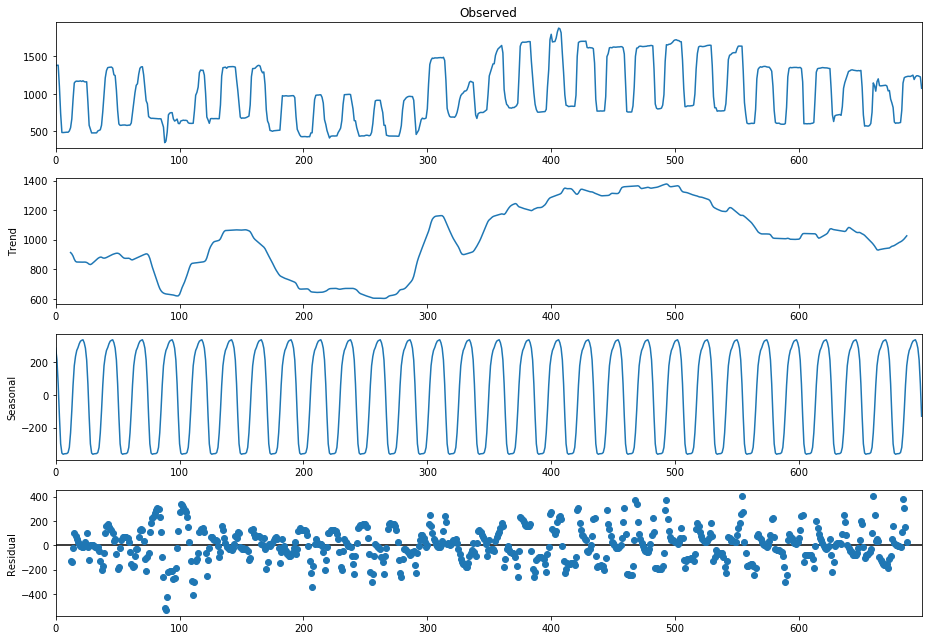

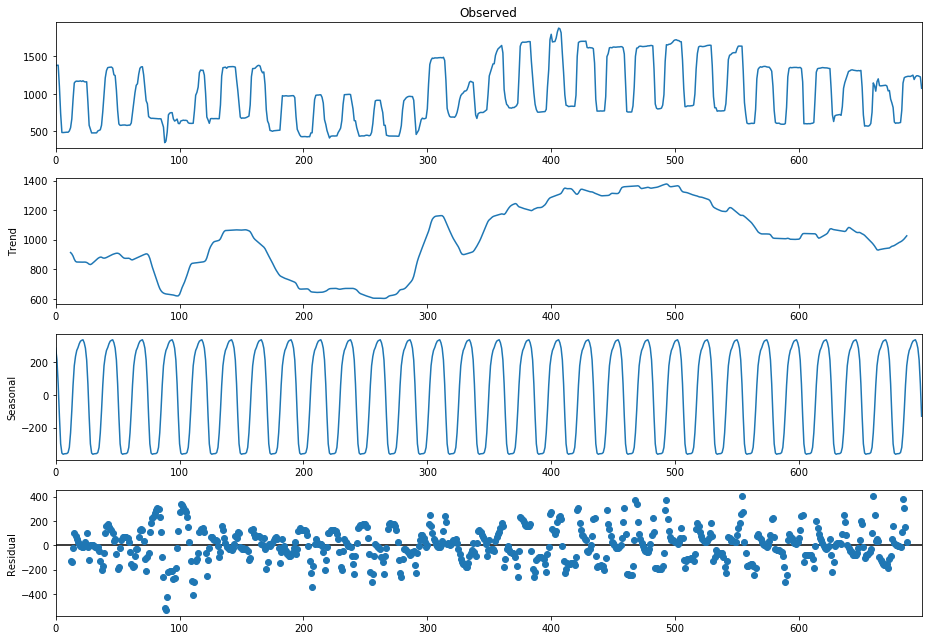

In [22]:
plt.rcParams['figure.figsize']= (13,9)
res.plot()

In [18]:
res?

Type:        DecomposeResult
String form: <statsmodels.tsa.seasonal.DecomposeResult object at 0x7f9e5f029510>
File:        ~/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/seasonal.py
Docstring:  
Results class for seasonal decompositions

Parameters
----------
observed : array_like
    The data series that has been decomposed.
seasonal : array_like
    The seasonal component of the data series.
trend : array_like
    The trend component of the data series.
resid : array_like
    The residual component of the data series.
weights : array_like, optional
    The weights used to reduce outlier influence.


In [35]:
np.polyfit(np.arange(len(res.trend.dropna())),res.trend, 1)

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

In [29]:
np.arange(range(len(res.trend)))

TypeError: unsupported operand type(s) for -: 'range' and 'int'

In [60]:
y = res.trend[~np.isnan(res.trend)]
x = np.arange(y.shape[0])

In [61]:
m, b = np.polyfit(x,y,1)

In [62]:
# x_fit = np.arange(y.shape[0])
y_fit = m*x + b

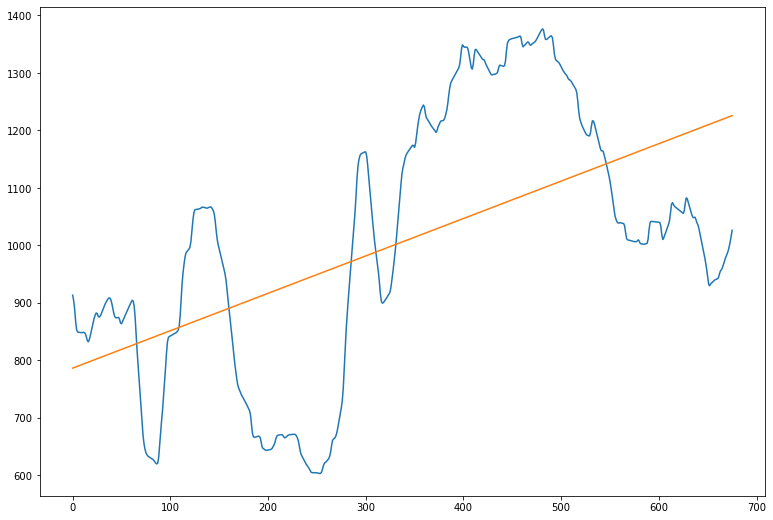

In [63]:
plt.plot(x,y)
plt.plot(x,y_fit)

In [68]:
m_h1, b_h1 = np.polyfit(np.arange(h1_ar.shape[0]), h1_ar,1)
x_h1 = np.arange(h1_ar.shape[0])
y_h1 = m_h1*x_h1 + b_h1

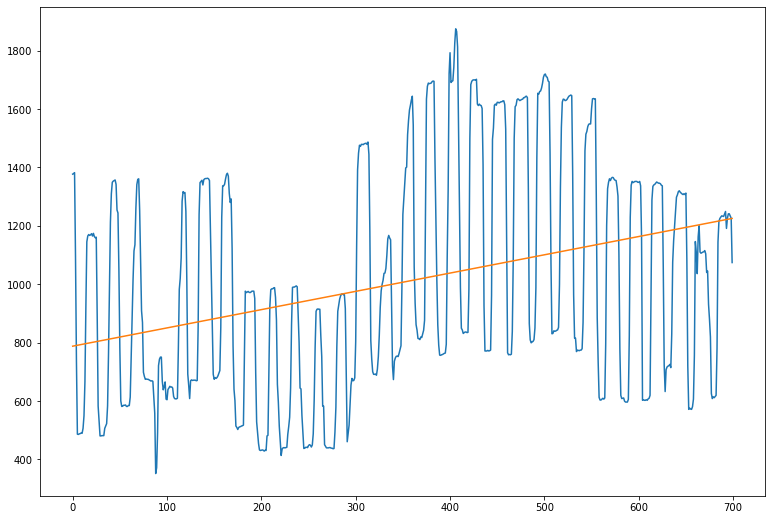

In [69]:
plt.plot(x_h1, h1_ar)
plt.plot(x_h1, y_h1)

In [77]:
s = pd.Series([('A',1),('B',2)])

In [78]:
s.map(lambda x:x[0])

0    A
1    B
dtype: object

In [149]:
df_test = df[df['V1']=='H105'].iloc[:,1:].dropna(axis=1)

In [151]:
df_test.transpose().describe()

,104
count,700.000000
mean,2186.820000
std,356.650403
min,1373.000000
25%,1897.000000
50%,2212.000000
75%,2425.250000
max,3020.000000


In [152]:
ar = np.array(df_test)[0]

In [153]:
res = seasonal_decompose(ar,'additive', period=24)
trend_ar = res.trend[~np.isnan(res.trend)]

In [154]:
np.polyfit(np.arange(trend_ar.shape[0]), trend_ar, 1)

array([6.77763603e-02, 2.15479402e+03])

In [157]:
tqdm.pandas?

Signature: tqdm.pandas(**tqdm_kwargs)
Docstring:
Registers the current `tqdm` class with
    pandas.core.
    ( frame.DataFrame
    | series.Series
    | groupby.(generic.)DataFrameGroupBy
    | groupby.(generic.)SeriesGroupBy
    ).progress_apply

A new instance will be create every time `progress_apply` is called,
and each instance will automatically `close()` upon completion.

Parameters
----------
tqdm_kwargs  : arguments for the tqdm instance

Examples
--------
>>> import pandas as pd
>>> import numpy as np
>>> from tqdm import tqdm
>>> from tqdm.gui import tqdm as tqdm_gui
>>>
>>> df = pd.DataFrame(np.random.randint(0, 100, (100000, 6)))
>>> tqdm.pandas(ncols=50)  # can use tqdm_gui, optional kwargs, etc
>>> # Now you can use `progress_apply` instead of `apply`
>>> df.groupby(0).progress_apply(lambda x: x**2)

References
----------
<https://stackoverflow.com/questions/18603270/        progress-indicator-during-pandas-operations-python>
File:      ~/anaconda3/lib/python3.7/site-pa